**MSE plot from Wyoming sounding data**

Taken from a colab notebook [here](https://colab.research.google.com/drive/1smn0_0IVekVSmhIfOvE6OT9phqfOWcf0?usp=sharing), but edited here so it can be executed locally (after installing necessary libraries siphon, metpy, MSEplots, scikit-learn, matplotlib=3.0.0 -- but that doesn't work with python 3.8. 


In [3]:
# !conda install siphon # -- once only, since we are on our own machine here

import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime
import matplotlib.pyplot as plt

In [23]:
#!pip install sklearn
#!pip install --upgrade mseplots_pkg # -- once only, since we are on our own machine here
#!conda install metpy # -- once only, since we are on our own machine here
#!conda install "matplotlib==3.0.0" # -- once only, since we are on our own machine here

import metpy
from metpy.calc.thermo import *
from metpy.units import units
import MSEplots
from MSEplots import plots as mpt

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
print("metpy version:",metpy.__version__)
print("MSEplots version:",MSEplots.__version__)

metpy version: 1.0
MSEplots version: 2.5.2


In [9]:
# read data from Wyoming sounding 
date = datetime(2021, 2, 11, 00)
station = 'MFL'

df = WyomingUpperAir.request_data(date, station)
p = df['pressure'].values #hPa
T = df['temperature'].values  #C
Td = df['dewpoint'].values #C
Z = df['height'].values   #m
u = df['u_wind'].values # m/s
v = df['v_wind'].values # m/s

r = mixing_ratio( saturation_vapor_pressure(Td*units('degC')), p*units('hPa') ) 
q = specific_humidity_from_mixing_ratio(r).magnitude
rs = mixing_ratio( saturation_vapor_pressure(T*units('degC')), p*units('hPa') ) 
qs = specific_humidity_from_mixing_ratio(rs).magnitude

In [10]:
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation,pw
0,1018.0,5,24.8,19.8,110.0,5.0,-4.698463,1.710101e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
1,1000.0,163,23.0,18.0,110.0,8.0,-7.517541,2.736161e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
2,983.8,305,21.7,17.6,105.0,11.0,-10.625184,2.847009e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
3,959.0,526,19.6,17.0,112.0,12.0,-11.126206,4.495279e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
4,949.7,610,19.2,16.0,115.0,13.0,-11.782001,5.494037e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,10.1,30785,-43.7,-84.7,280.0,29.0,28.559425,-5.035797e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
98,10.0,30820,-43.7,-84.7,280.0,30.0,29.544233,-5.209445e+00,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
99,8.8,31699,-41.5,-83.9,270.0,39.0,39.000000,7.164184e-15,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64
100,8.4,32004,-40.7,-83.6,285.0,43.0,41.534811,-1.112922e+01,MFL,72202,2021-02-11,25.75,-80.38,5.0,24.64


In [11]:
dd = mpt.indices_output(p,T,q,Z)
dd 

,Precipitable_water,Column_relative_humidity,CAPE,CIN,LCL,LFC,EL
0,24.318 millimeter,40.33 dimensionless,838.835 joule / kilogram,97.003 joule / kilogram,942.908 millibar,685.61 millibar,257.29 millibar


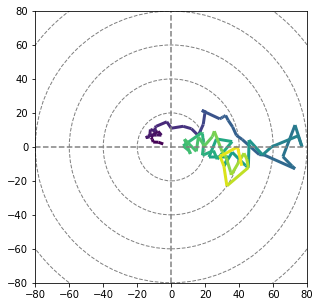

In [12]:
from metpy.plots import Hodograph

fig, ax_hod = plt.subplots(1,1,figsize=(5,5))
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, Z);

TypeError: alpha must be a float or None

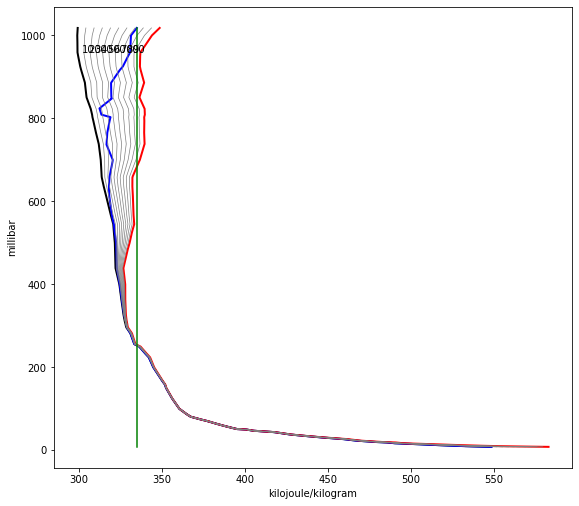

In [24]:
fig,ax = mpt.msed_plots(p, T ,q , Z, h0_std=2000, ensemble_size=20, ent_rate=np.arange(0,2,0.05), entrain=True)
#mpt.add_curves_Wyoming(ax,datetime(2020,10,8,0),'MFL',linewidth=1.0) # adding sounding data from another day (thin lines)
ax.set_title('20210211 00Z, MFL',fontsize=20) # adding figure title
mpt.add_wndbarbs(ax,p,u,v)

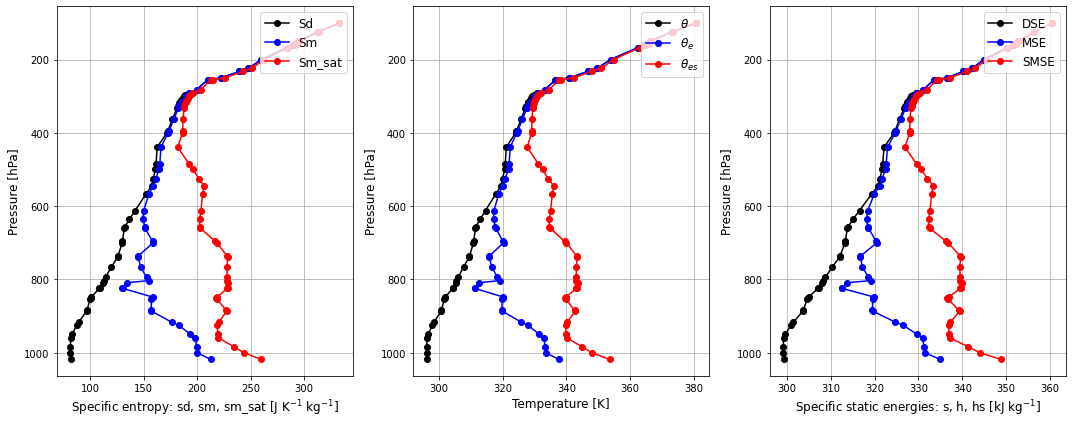

In [25]:
fig = plt.figure(figsize = (15,6)) 

ax1 = fig.add_subplot(1,3,1)
mpt.entropy_profiles(p,T,q,ax=ax1)
ax2 = fig.add_subplot(1,3,2)
mpt.theta_profiles(p,T,q,ax=ax2)
ax3 = fig.add_subplot(1,3,3)
mpt.mse_profiles(p,T,q,Z,ax=ax3)
plt.tight_layout()